# Air Quality Analysis in India (Time Series)

<img src="https://miro.medium.com/v2/resize:fit:2000/format:webp/1*yLegbJoBEvZxtpfZl8Z2jA.jpeg" alt="Economic News">

<a href="https://statso.io/air-quality-index-analysis-case-study/#google_vignette" target="_blank">Data burada</a>

* Bu projede, Prophet kullanarak hava kirliliği tahmini yapacağız, veri seti sadece bir ayı içeriyor, kirlilik için farklı değişkenler var fakat ben değişken olarak "co" kullanacağım, (karbonmonoksit). Model, geçmiş verileri kullanarak gelecekteki hava kirliliği "co" seviyesini tahmin edecek.


In [8]:
#!pip install prophet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
import plotly.graph_objects as go


### Data Dict

In [2]:
df=pd.read_csv("delhiaqi.csv")

In [3]:
df.head()

date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  
0   5.83  
1   7.66  
2  11.40  
3  13.55  
4  14.19

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


In [5]:
df.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Date sutunu obj görünüyor, date formatında değil, o yüzden önce bununla date formatına çevirir

In [7]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [8]:
df.head()

date       co     no    no2    o3    so2   pm2_5    pm10  \
0 2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1 2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2 2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3 2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4 2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  day  month  year  
0   5.83    1      1  2023  
1   7.66    1      1  2023  
2  11.40    1      1  2023  
3  13.55    1      1  2023  
4  14.19    1      1  2023

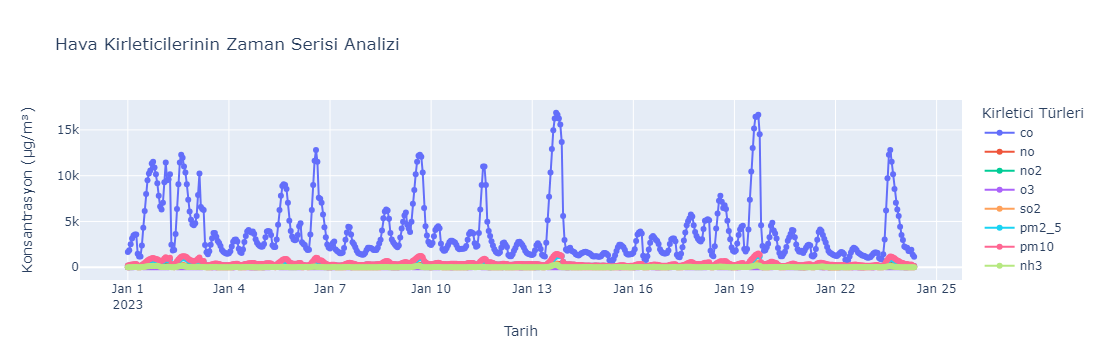

In [9]:
fig = go.Figure()

for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
    fig.add_trace(go.Scatter(x=df['date'], y=df[pollutant], mode='lines+markers', 
                             name=pollutant))

fig.update_layout(title='Hava Kirleticilerinin Zaman Serisi Analizi',
                  xaxis_title='Tarih', yaxis_title='Konsantrasyon (µg/m³)',
                  legend_title='Kirletici Türleri')

fig.show()

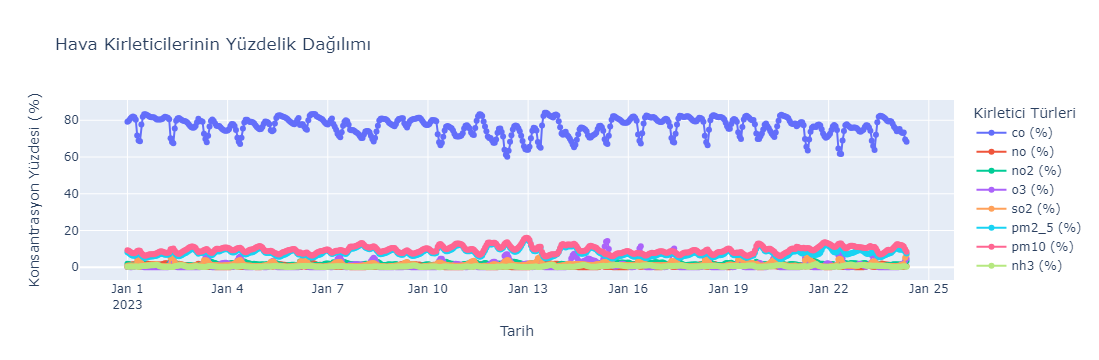

In [10]:
# Yüzdelik hesaplama
total_pollutants = df[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].sum(axis=1)
for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
    df[f'{pollutant}_percentage'] = (df[pollutant] / total_pollutants) * 100

# Yüzdelik grafiği oluşturma
fig = go.Figure()

for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
    fig.add_trace(go.Scatter(x=df['date'], y=df[f'{pollutant}_percentage'], mode='lines+markers', 
                             name=f'{pollutant} (%)'))

fig.update_layout(title='Hava Kirleticilerinin Yüzdelik Dağılımı',
                  xaxis_title='Tarih', yaxis_title='Konsantrasyon Yüzdesi (%)',
                  legend_title='Kirletici Türleri')

fig.show()

* pm2 ince partiküllü bir madde ve akciğerlere doğrudan zarar verip solunumu güçleştiren bir şey, grafiğini görmek istedim, belli tarihlerde pik yapmış. en çok pazartesi ve cuma günleri yükselmiş, bu belki trafiğin o günlerde artmasına bağlı olabilir, üretim faaliyetlerinde de artış olabilir ogünlerde cuma haftanın son iş günü olması dolayısıyla.

* Haftalık olarak pm2 nin grafiğini oluşturalım.

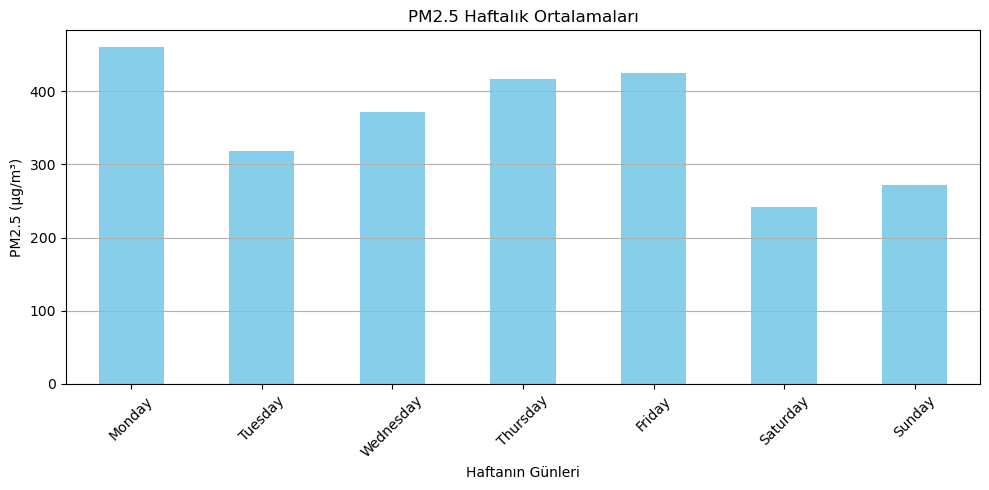

In [11]:
df['day_of_week'] = df['date'].dt.day_name()
# Haftalık ortalamaları hesaplama
weekly_avg = df.groupby('day_of_week')['pm2_5'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 5))
weekly_avg.plot(kind='bar', color='skyblue')
plt.title('PM2.5 Haftalık Ortalamaları')
plt.xlabel('Haftanın Günleri')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

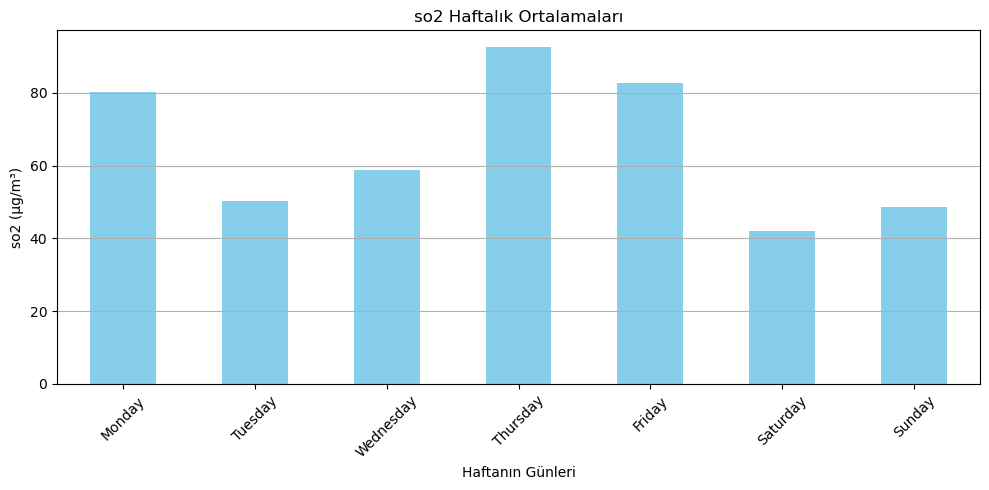

In [12]:
df['day_of_week'] = df['date'].dt.day_name()
# Haftalık ortalamaları hesaplama
weekly_avg = df.groupby('day_of_week')['so2'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 5))
weekly_avg.plot(kind='bar', color='skyblue')
plt.title('so2 Haftalık Ortalamaları')
plt.xlabel('Haftanın Günleri')
plt.ylabel('so2 (µg/m³)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [13]:
print(df['month'].value_counts())
# Datada sadece 1 aylık bilgi var

month
1    561
Name: count, dtype: int64


* Aylık kirliliğin haftanın günlerini göstererek grafik yaparak hangi günlerde yükseliş ve düşüş olduğunu görelim, haftasonunda belirgin bir düşüş var, trafiğin azalması üretimin durması bunu etkilemiş olabilir.

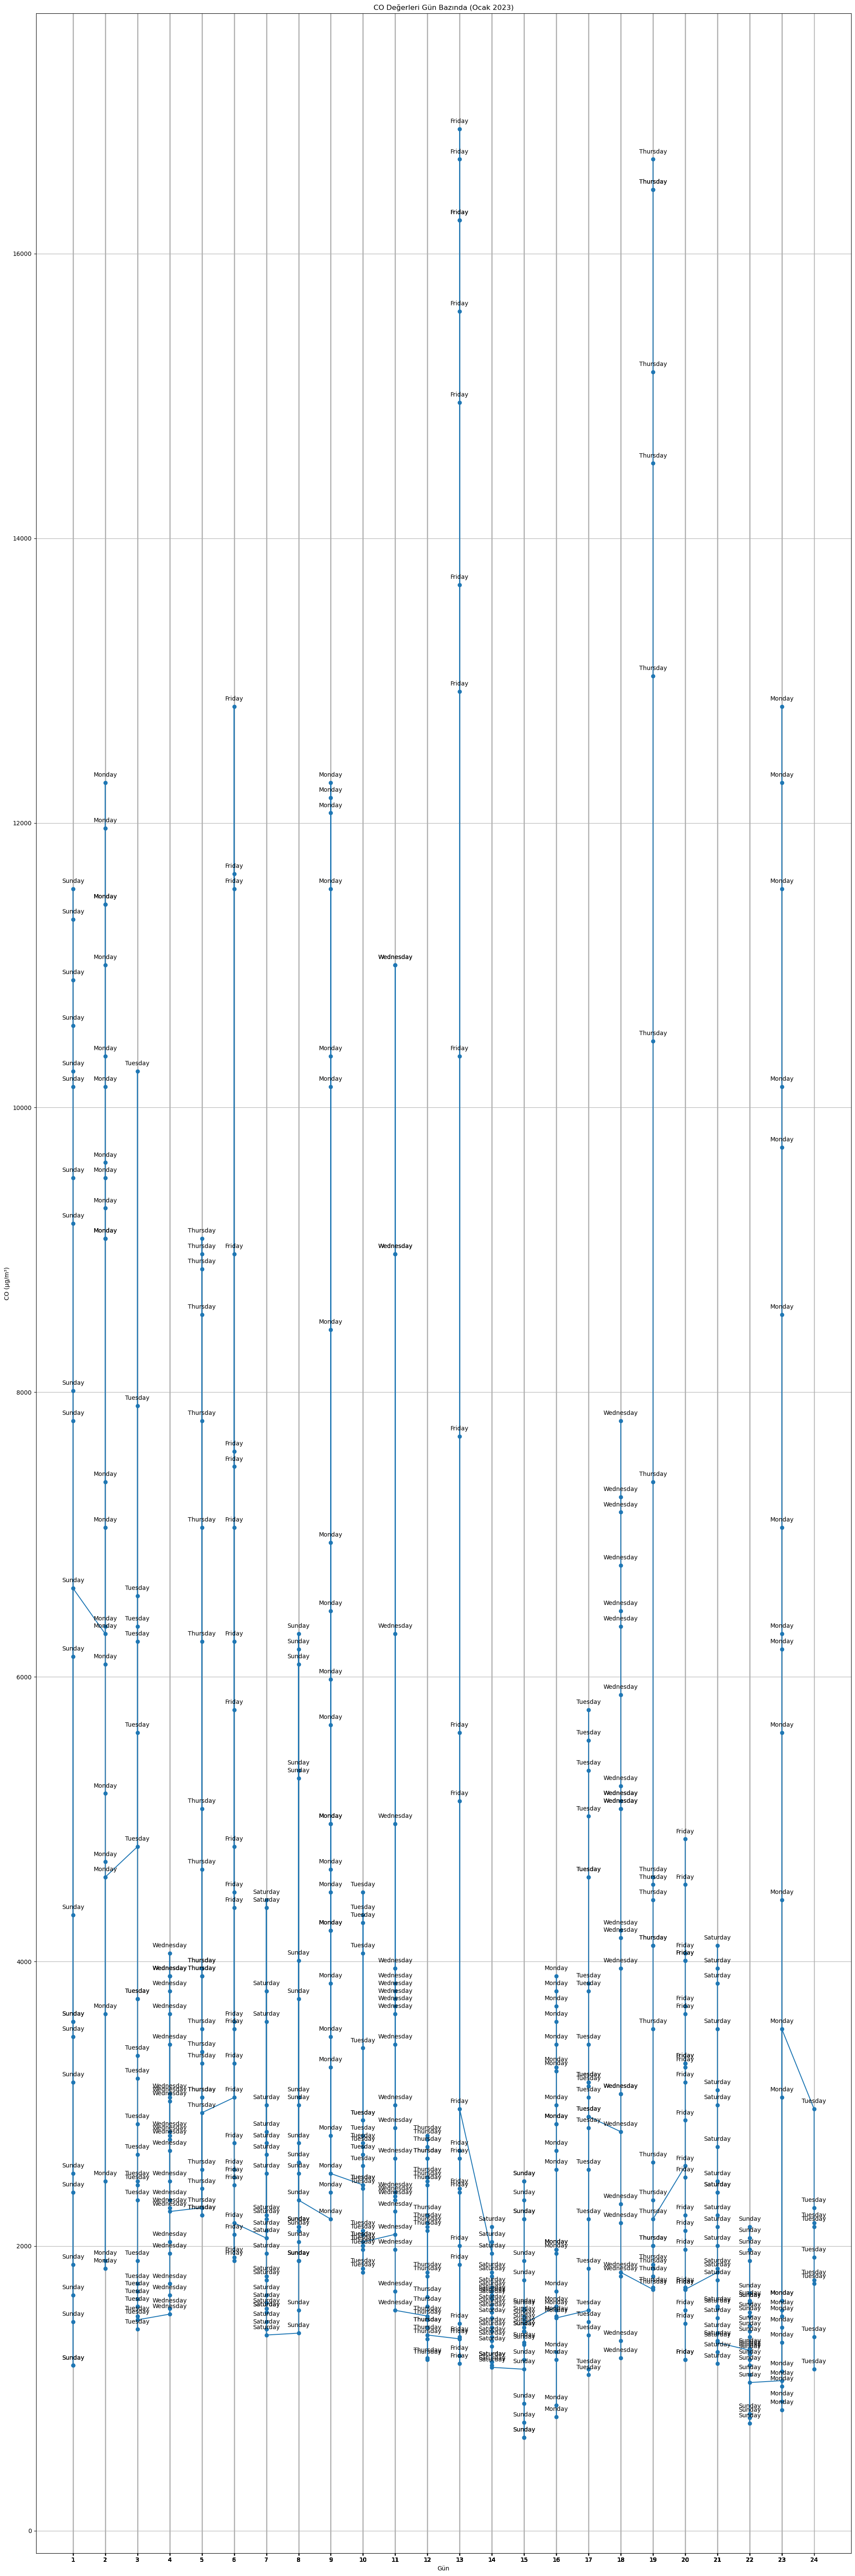

In [35]:
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()
plt.figure(figsize=(20, 60))
plt.plot(df['day'], df['co'], marker='o')
plt.title('CO Değerleri Gün Bazında (Ocak 2023)')
plt.xlabel('Gün')
plt.ylabel('CO (µg/m³)')
plt.xticks(df['day'])  # Günleri x ekseninde göster
# Her noktanın üzerine haftanın gününü ekleme
for i, txt in enumerate(df['day_of_week']):
    plt.annotate(txt, (df['day'].iloc[i], df['co'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid()
plt.tight_layout()
plt.show()

#### Time Series Modelling

In [14]:
co_forecast=df.rename(columns={'date':'ds','co':'y'})
# Datdayı co_forecast dfsine atadım, hedefim "co" yani sonraki ayın karbondioksit tahminini yapacağım.

In [15]:
co_forecast.head()

ds        y     no    no2    o3    so2   pm2_5    pm10  \
0 2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1 2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2 2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3 2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4 2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  day  ...  year  co_percentage  no_percentage  no2_percentage  \
0   5.83    1  ...  2023      79.207153       0.079419        1.885475   
1   7.66    1  ...  2023      79.746749       0.290966        1.798696   
2  11.40    1  ...  2023      80.864355       0.893027        1.413315   
3  13.55    1  ...  2023      81.670771       1.436718        1.154713   
4  14.19    1  ...  2023      82.000543       1.626135        1.068657   

   o3_percentage  so2_percentage  pm2_5_percentage  pm10_percentage  \
0       0.282271        0.855425          8.099264         9.312072   
1       0.084901        0.945851          7.800608         9.005427   
2       0.000644        0.967768          7.095569         8.398061   
3       0.022032        0.926881          6.555040         7.882637   
4       0.128740        0.923618          6.291944         7.625167   

   nh3_percentage  day_of_week  
0        0.278922       Sunday  
1        0.326803       Sunday  
2        0.367262       Sunday  
3        0.351209       Sunday  
4        0.335196       Sunday  

[5 rows x 21 columns]

12:32:10 - cmdstanpy - INFO - Chain [1] start processing
12:32:10 - cmdstanpy - INFO - Chain [1] done processing


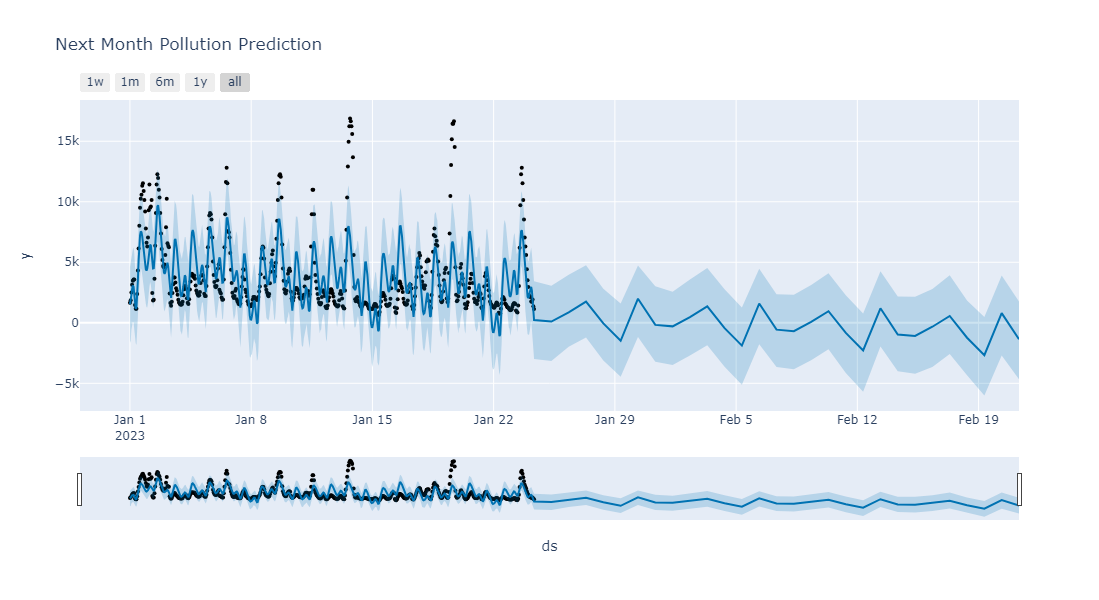

In [18]:
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
model=Prophet()
model.fit(co_forecast)
co_forecastnew=model.make_future_dataframe(periods=28)
predictions=model.predict(co_forecastnew)
plot_plotly(model, predictions).update_layout(title="Next Month Pollution Prediction")

* Prophet paketini kullanarak hava kirliliği tahminini yaptık,belirtilen dönem için beklenen "co" seviyesi bu şekilde.